In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('mnist_train.csv')
print(df)
df.head()

       5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...    0.608  0.609  \
0      0  0    0    0    0    0    0    0    0    0  ...        0      0   
1      4  0    0    0    0    0    0    0    0    0  ...        0      0   
2      1  0    0    0    0    0    0    0    0    0  ...        0      0   
3      9  0    0    0    0    0    0    0    0    0  ...        0      0   
4      2  0    0    0    0    0    0    0    0    0  ...        0      0   
5      1  0    0    0    0    0    0    0    0    0  ...        0      0   
6      3  0    0    0    0    0    0    0    0    0  ...        0      0   
7      1  0    0    0    0    0    0    0    0    0  ...        0      0   
8      4  0    0    0    0    0    0    0    0    0  ...        0      0   
9      3  0    0    0    0    0    0    0    0    0  ...        0      0   
10     5  0    0    0    0    0    0    0    0    0  ...        0      0   
11     3  0    0    0    0    0    0    0    0    0  ...        0      0   
12     6  0 

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data=df.values
data=data[:42000,:]
print(data.shape)

X=data[:,1:]
Y=data[:,0]

print(X.shape)
print(Y.shape)

split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(42000, 785)
(42000, 784)
(42000,)
33600
(33600, 784) (33600,)
(8400, 784) (8400,)


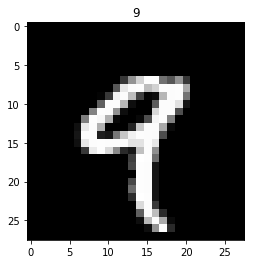

In [4]:
def drwImg(X,Y):
    img=X.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(Y)
    plt.show()

drwImg(X_train[3],Y_train[3])

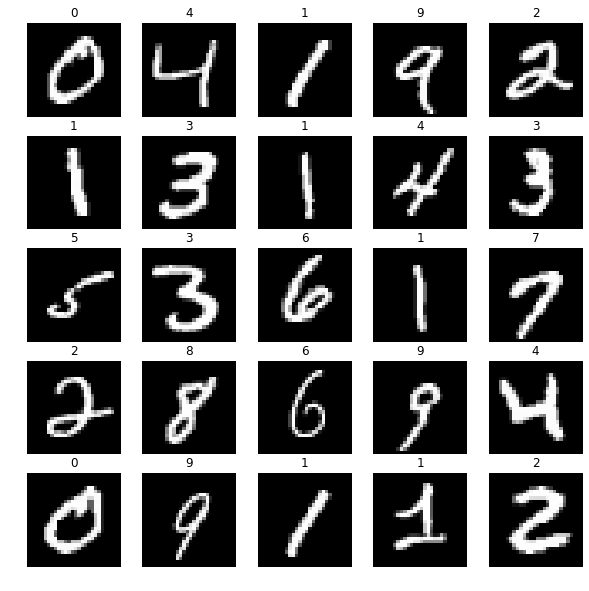

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    img=X_train[i].reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(Y_train[i])
    plt.axis("off")

In [6]:
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dis(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [7]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

6


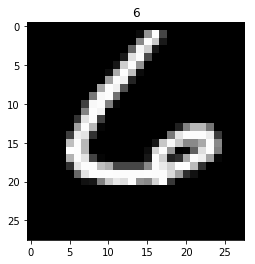

In [8]:
drwImg(X_test[0],Y_test[0])
